<a href="https://colab.research.google.com/github/ProjectStuff0w0/Pneumoni_in_Covid/blob/main/%5BWorking%5DTransfer_Learning_revisi_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KFOLD Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/RISET COVID-19/'

/content/drive/.shortcut-targets-by-id/1GcqHp_Q05i8uwPeX2JIucskmRXUCXsGw/RISET COVID-19


In [ ]:
from os import listdir
import pandas as pd

negative = pd.DataFrame(listdir('/content/drive/MyDrive/RISET COVID-19/data/negative'), columns = ['filename'])
positive = pd.DataFrame(listdir('/content/drive/MyDrive/RISET COVID-19/data/severe'), columns = ['filename'])
# listdir('./negative/')
negative['class'] = 'negative'
positive['class'] = 'severe'

all_data = pd.concat([negative,positive])
all_data.to_excel('/all_data.xlsx')
print('generate file successful!')


generate file successful!


In [ ]:
new = pd.read_excel('all_data.xlsx')
new

,filename,class
0,negative (1).jpg,negative
1,negative (10).jpg,negative
2,negative (11).jpg,negative
3,negative (12).jpg,negative
4,negative (13).jpg,negative
...,...,...
216,severe (95).jpg,severe
217,severe (96).jpg,severe
218,severe (97).jpg,severe
219,severe (98).jpg,severe


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# from google.colab import drive
from keras.layers import Input, Dense
image_size = (244,244)
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(image_size)+(3,)),
        layers.experimental.preprocessing.RandomRotation(1),
        layers.experimental.preprocessing.RandomFlip("vertical", input_shape=(image_size)+(3,)),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomWidth(0.1),
        layers.experimental.preprocessing.RandomContrast([0.2,1.0]),
        layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
    ]
)
def inceptionV3():
    pre_trained_model = InceptionV3(input_shape = (image_size)+(3,),
                                  include_top = False,
                                  weights = 'imagenet')
    for layer in pre_trained_model.layers:
        layer.trainable = False

#     x = data_augmentation(pre_trained_model.input)
          # Flatten the output layer to 1 dimension
    x = layers.Flatten()(pre_trained_model.output)
          # Add a fully connected layer with 1,024 hidden units and ReLU activation
    x = layers.Dense(1024, activation='relu')(x)
          # Add a dropout rate of 0.2
    x = layers.Dropout(0.2)(x)                  
          # Add a final sigmoid layer for classification
    x = layers.Dense(1, activation='sigmoid')(x)           

    model = Model(pre_trained_model.input, x) 
    model.summary()
    epochs = 10

    callbacks = [
        keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
    ]
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"],

    )
    history = model.fit(
        train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
    )
    

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
kf = KFold(n_splits = 5)
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 
Y =  new['class']

idg = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.3,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         rescale=1./255)

VALIDATION_ACCURACY = []
VALIDAITON_LOSS = []

image_dir = '/content/drive/MyDrive/RISET COVID-19/alldata'

save_dir = '/saved_models/'
fold_var = 1

for train_index, val_index in kf.split(np.zeros(len(Y)),Y):
    training_data = new.iloc[train_index]
    validation_data = new.iloc[val_index]
    
    train_data_generator = idg.flow_from_dataframe(training_data, directory = image_dir,
                                                   x_col = "filename", y_col = "class",
                                                   class_mode = "categorical", shuffle = True)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory = image_dir,
                                                    x_col = "filename",
                                                    y_col = "class",
                                                    class_mode = "categorical",
                                                    shuffle = True)

    # CREATE NEW MODEL
    pre_trained_model = InceptionV3(input_shape = (image_size)+(3,),
                                  include_top = False,
                                  weights = 'imagenet')
    for layer in pre_trained_model.layers:
         layer.trainable = False

    x = data_augmentation(pre_trained_model.input)
          # Flatten the output layer to 1 dimension
    x = layers.Flatten()(pre_trained_model.output)
          # Add a fully connected layer with 1,024 hidden units and ReLU activation
    x = layers.Dense(1024, activation='relu')(x)
          # Add a dropout rate of 0.2
    x = layers.Dropout(0.2)(x)                  
          # Add a final sigmoid layer for classification
    x = layers.Dense(1, activation='sigmoid')(x)           

    model = Model(pre_trained_model.input, x) 
    model.summary()
    epochs = 10

    callbacks = [
        keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
    ]
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"],

    )
    history = model.fit(
        train_data_generator,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=valid_data_generator,
    )

Found 176 validated image filenames belonging to 2 classes.
Found 45 validated image filenames belonging to 1 classes.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 121, 121, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 121, 121, 32  96         ['conv2

# ------------------------------------------------

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16, VGG19, ResNet152, ResNet50, Xception, InceptionResNetV2, NASNetLarge, ResNet152V2
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
from keras.layers import Input, Dense

#drive.mount('/content/drive')

%cd '/content/drive/MyDrive/RISET COVID-19/data/'

import os

num_skipped = 0
for folder_name in ("/content/drive/MyDrive/RISET COVID-19/data/negative", "/content/drive/MyDrive/RISET COVID-19/data/severe"):
    folder_path = os.path.join("data", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

/content/drive/.shortcut-targets-by-id/1GcqHp_Q05i8uwPeX2JIucskmRXUCXsGw/RISET COVID-19/data
Deleted 0 images


In [ ]:
def make_model(history):
  import matplotlib.pyplot as plt 
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))


  # Plot training and validation accuracy per epoch
  plt.plot(epochs,acc,'r',label='training')
  plt.plot(epochs,val_acc,'b',label='validation')
  plt.legend()
  plt.title('Accuracy')

  fig = plt.figure()

  fig.set_size_inches(10, 5)


  # Plot training and validation loss per epoch
  #plt.plot(epochs, loss)
  #plt.plot(epochs, val_loss)

  plt.plot(epochs,loss,'r',label='training')
  plt.plot(epochs,val_loss,'b',label='validation')
  plt.legend()
  plt.title('Validation loss')



  skor = np.mean(history.history['accuracy'])
  print(skor)
  print('Accuracy Validation 1: {}'.format(np.round((history.history['val_accuracy'][-1])*100, 2)))

In [ ]:
#InceptionV3
from tensorflow.keras.models import load_model
import tensorflow as tf

def inceptionV33(val_ds,train_ds):
  import matplotlib.pyplot as plt
  pre_trained_model = InceptionV3(input_shape = (image_size)+(3,),
                                  include_top = False,
                                  weights = 'imagenet')
  for layer in pre_trained_model.layers:
    layer.trainable = False
  
  inputs = keras.Input(shape=(image_size)+(3,))
  x = data_augmentation(pre_trained_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(pre_trained_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)           

  model = keras.Model(pre_trained_model.input, x) 
  model.summary()

  for counter in range(5):

    epochs = 20

    callbacks = [
        keras.callbacks.ModelCheckpoint("/save_at_{epoch}.h5"),
    ]
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"],

    )
    history = model.fit(
        train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
    )
  scores = model.evaluate(val_ds, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  make_model(history)  

'''   MODEL_BASE_PATH = "model"
    PROJECT_NAME = "medium_project"
    SAVE_MODEL_NAME = "model.h5"
    save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
    if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
        os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
        
    print('Saving Model At {}...'.format(save_model_path))
    model.save(save_model_path,include_optimizer=False)
'''

  #BATAS RUNNING
  
  #MODEL_PATH = 'model/medium_project/model.h5'
  #model = load_model(MODEL_PATH,compile=False)

#Resnet50
def resnet50():
  resnet_model = ResNet50(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in resnet_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(resnet_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(resnet_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(resnet_model.input, x) 



#Resnet152
def resnet152():
  resnet_model = ResNet152(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in resnet_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(resnet_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(resnet_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(resnet_model.input, x)

#VGG16
def vgg16(val_ds,train_ds):
  vgg16_model = VGG16(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in vgg16_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(vgg16_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(vgg16_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = keras.Model(vgg16_model.input, x) 
  
  model.summary()

  for counter in range(5):

    epochs = 100

    callbacks = [
        keras.callbacks.ModelCheckpoint("/save_at_{epoch}.h5"),
    ]
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"],

    )
    history = model.fit(
        train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
    )
  scores = model.evaluate(val_ds, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  make_model(history)  
    


  

#VGG19
def vgg19(val_ds,train_ds):
  vgg16_model = VGG19(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in vgg16_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(vgg16_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(vgg16_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(vgg16_model.input, x)

  epochs = 10

  callbacks = [
      #keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
  ]
  model.compile(
      optimizer=keras.optimizers.Adam(1e-3),
      loss="binary_crossentropy",
      metrics=["accuracy"],

  )
  history = model.fit(
      train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
  )

  #model.save(save_model_path,include_optimizer=False)

  scores = model.evaluate(X_val, Y_val, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  make_model(history)  

#xception
def xception():
  xception_model = Xception(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in xception_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(xception_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(xception_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(xception_model.input, x)

  model.summary()

#InceptionResNetV2

def inResv():
  inResv_model = InceptionResNetV2(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in inResv_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(inResv_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(inResv_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(inResv_model.input, x)

  model.summary()

  epochs = 100

  callbacks = [
      #keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
  ]
  model.compile(
      optimizer=keras.optimizers.Adam(1e-3),
      loss="binary_crossentropy",
      metrics=["accuracy"],

  )
  history = model.fit(
      train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
  )
  MODEL_BASE_PATH = "model"
  PROJECT_NAME = "medium_project"
  SAVE_MODEL_NAME = "model.h5"
  save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
  if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
      os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
      
  print('Saving Model At {}...'.format(save_model_path))
  model.save(save_model_path,include_optimizer=False)

  scores = model.evaluate(X_val, Y_val, verbose=0)
    #print("Accuracy: %.2f%%" % (scores[1]*100))
  make_model(history)  

def nasLarge():

  nasLarge_model = NASNetLarge(weights=None, input_shape=(image_size)+(3,), include_top=False)

  for layer in nasLarge_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(nasLarge_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(nasLarge_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(nasLarge_model.input, x)

  model.summary()

#Resnet152V2

def Res15V2(val_ds,train_ds):
  
  Res15V2_model = ResNet152V2(weights='imagenet', input_shape=(image_size)+(3,), include_top=False)

  for layer in Res15V2_model.layers[:]:
        layer.trainable = False

  x = data_augmentation(Res15V2_model.input)
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(Res15V2_model.output)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)                  
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)   

  model = Model(Res15V2_model.input, x)

  model.summary()

  epochs = 10

  callbacks = [
      #keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
  ]
  model.compile(
      optimizer=keras.optimizers.Adam(1e-3),
      loss="binary_crossentropy",
      metrics=["accuracy"],

  )
  history = model.fit(
      train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
  )

  #model.save(save_model_path,include_optimizer=False)

  scores = model.evaluate(X_val, Y_val, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  make_model(history) 

Found 221 files belonging to 2 classes.
Using 177 files for training.
Found 221 files belonging to 2 classes.
Using 44 files for validation.
36
234545216/234545216 [==============================] - 11s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 250, 250, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 122, 122, 64  9472        ['conv1_pad[0

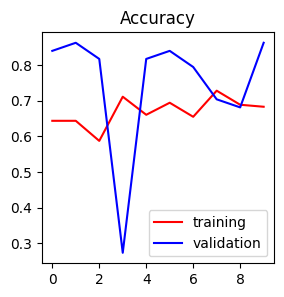

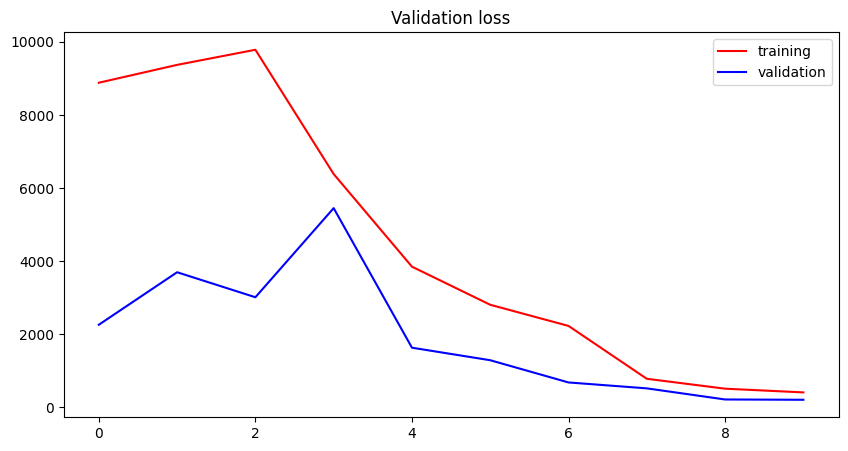

In [ ]:
# input image dimension
image_size = (244,244)

#image_size = (480,480)
batch_size = 5 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/RISET COVID-19/data",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/RISET COVID-19/data",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    
)

x_train = []
y_train = []

x_test = []
y_test = []


plt.figure(figsize=(3, 3))
print(len(train_ds))
for images, labels in train_ds.take(35):
    for i in range(5):
        #ax = plt.subplot(3, 5, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        #f2 = np.vectorize(labels[i])
        #plt.title(f2)
        #plt.title(int(labels[i]))
        #plt.axis("off")
        x_train.append(images[i])
        y_train.append(labels[i].numpy())

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(image_size)+(3,)),
        layers.experimental.preprocessing.RandomRotation(1),
        layers.experimental.preprocessing.RandomFlip("vertical", input_shape=(image_size)+(3,)),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomWidth(0.1),
        layers.experimental.preprocessing.RandomContrast([0.2,1.0]),
        layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
    ]
)


x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#TARUH MODEL DISINI




#inceptionV33(val_ds,train_ds)
#vgg19(val_ds,train_ds)
#vgg16(val_ds,train_ds)
Res15V2(val_ds,train_ds)
#xception()
#inResv()
#nasLarge()


In [ ]:
#Algoritma KFOLD
skf = KFold(n_splits=3, shuffle=True)
skf.get_n_splits(x_train, y_train)
acc_per_fold = []
loss_per_fold = []
foldNum=0
for train_index, val_index in skf.split(x_train,y_train):
  foldNum+=1
  print("Results for fold",foldNum)
  X_train, X_val = x_train[train_index], x_train[val_index]
  Y_train, Y_val = y_train[train_index], y_train[val_index]

  epochs = 2

  callbacks = [
      #keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
  ]
  model.compile(
      optimizer=keras.optimizers.Adam(1e-3),
      loss="binary_crossentropy",
      metrics=["accuracy"],

  )
  history = model.fit(
      train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
  )